In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/callsf0d4f5a.csv")


In [3]:
df.head()


,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript
0,4667960400,2033123310,963118,7/31/2024 23:56,8/1/2024 0:03,8/1/2024 0:34,\n\nAgent: Thank you for calling United Airlin...
1,1122072124,8186702651,519057,8/1/2024 0:03,8/1/2024 0:06,8/1/2024 0:18,\n\nAgent: Thank you for calling United Airlin...
2,6834291559,2416856629,158319,7/31/2024 23:59,8/1/2024 0:07,8/1/2024 0:26,\n\nAgent: Thank you for calling United Airlin...
3,2266439882,1154544516,488324,8/1/2024 0:05,8/1/2024 0:10,8/1/2024 0:17,\n\nAgent: Thank you for calling United Airlin...
4,1211603231,5214456437,721730,8/1/2024 0:04,8/1/2024 0:14,8/1/2024 0:23,\n\nAgent: Thank you for calling United Airlin...


convertin data types

In [3]:
df['call_start_datetime'] = pd.to_datetime(df['call_start_datetime'])
df['agent_assigned_datetime'] = pd.to_datetime(df['agent_assigned_datetime'])
df['call_end_datetime'] = pd.to_datetime(df['call_end_datetime'])

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71810 entries, 0 to 71809
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   call_id                  71810 non-null  int64         
 1   customer_id              71810 non-null  int64         
 2   agent_id                 71810 non-null  int64         
 3   call_start_datetime      71810 non-null  datetime64[ns]
 4   agent_assigned_datetime  71810 non-null  datetime64[ns]
 5   call_end_datetime        71810 non-null  datetime64[ns]
 6   call_transcript          71810 non-null  object        
dtypes: datetime64[ns](3), int64(3), object(1)
memory usage: 3.8+ MB


percentae of missin values

In [32]:
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
call_id,0,0.0
customer_id,0,0.0
agent_id,0,0.0
call_start_datetime,0,0.0
agent_assigned_datetime,0,0.0
call_end_datetime,0,0.0
call_transcript,0,0.0


In [4]:
df['time_difference'] = df['call_end_datetime'] - df['agent_assigned_datetime']

In [8]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00


In [5]:
df['minutes'] = df['time_difference'].dt.total_seconds() / 60

In [6]:
df.head()

,call_id,customer_id,agent_id,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='minutes'>

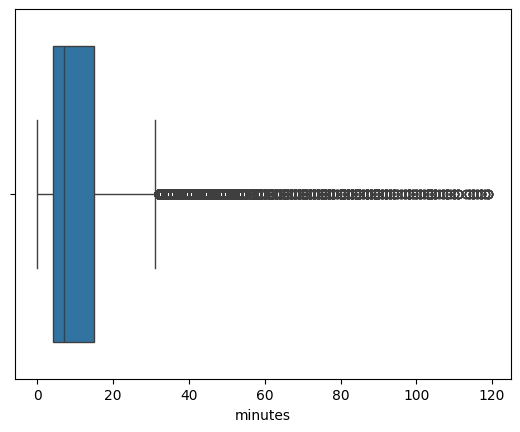

In [7]:
sns.boxplot(x=df['minutes'])

In [24]:
def find_outliers_zscore(df, minutes, threshold=15):
  z = np.abs((df[minutes] - df[minutes].mean()) / df[minutes].std())
  outliers = df[z > threshold]
  return outliers

# Example usage
outliers = find_outliers_zscore(df, 'minutes')
print(outliers)

Empty DataFrame
Columns: [call_id, customer_id, agent_id, call_start_datetime, agent_assigned_datetime, call_end_datetime, call_transcript, time_difference, minutes]
Index: []


<Axes: xlabel='minutes'>

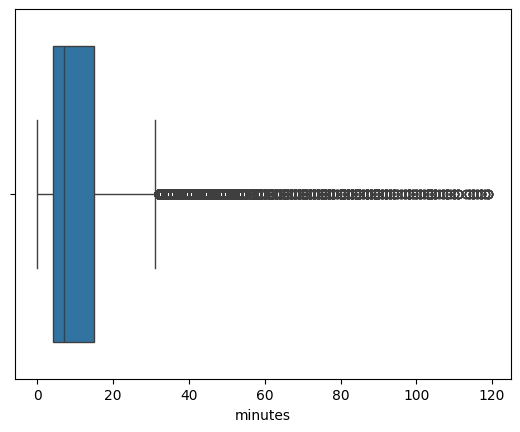

In [19]:
sns.boxplot(x=df['minutes'])


In [8]:
df['minutes'].describe()

,minutes
count,71810.000000
mean,11.617477
std,12.905025
min,0.000000
25%,4.000000
50%,7.000000
75%,15.000000
max,119.000000


In [28]:
df['minutes'].median()


7.0

In [29]:
df['minutes'].mode()


,minutes
0,3.0


In [12]:
df['minutes'].skew()


2.7661837353625938

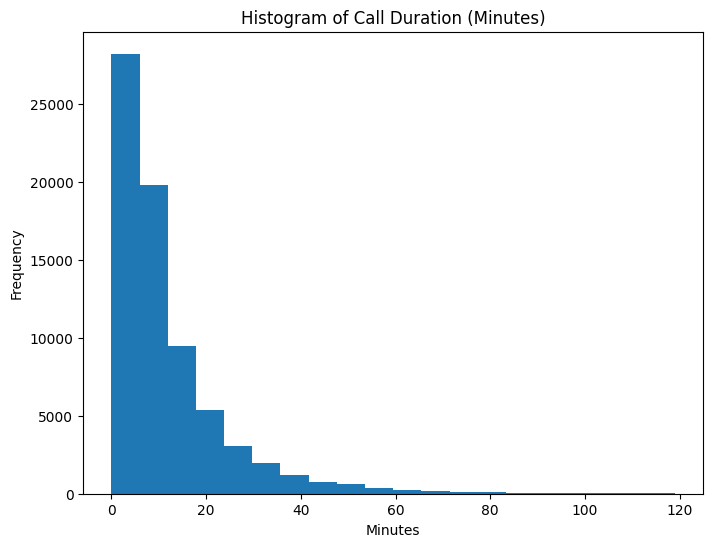

In [9]:
# prompt: plot  the histogram of the minutes and aents column

import matplotlib.pyplot as plt
# Histogram for 'minutes'
plt.figure(figsize=(8, 6))
plt.hist(df['minutes'], bins=20)
plt.xlabel('Minutes')
plt.ylabel('Frequency')
plt.title('Histogram of Call Duration (Minutes)')
plt.show()




In [10]:
df1=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/reason18315ff.csv")

In [11]:
df2=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/sentiment_statisticscc1e57a.csv")
mer=pd.merge(df,df1,on='call_id')

In [12]:
mr_df=pd.merge(mer,df2,on='call_id')


In [13]:
mr_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:06:00,6.0,Upgrade,616988,calm,polite,0.05,0.42


In [15]:
total = mr_df.isnull().sum().sort_values(ascending = False)
percent = (mr_df.isnull().sum()/mr_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
agent_tone,198,0.002971
average_sentiment,101,0.001515
call_id,0,0.000000
customer_id,0,0.000000
agent_id_x,0,0.000000
call_start_datetime,0,0.000000
agent_assigned_datetime,0,0.000000
call_end_datetime,0,0.000000
call_transcript,0,0.000000
time_difference,0,0.000000


In [42]:
def remove_outliers_iqr(mr_df, minutes):
  Q1 = mr_df[minutes].quantile(0.25)
  Q3 = mr_df[minutes].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  df_filtered = mr_df[(mr_df[minutes] > lower_bound) & (mr_df[minutes] < upper_bound)]
  return df_filtered

# Apply the function to remove outliers from the 'minutes' column
df_no_outliers = remove_outliers_iqr(mr_df, 'minutes')



/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='minutes'>

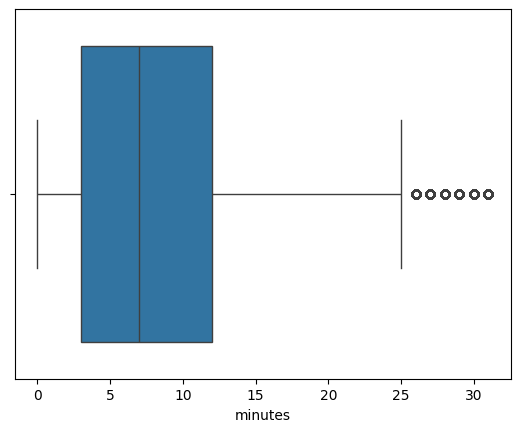

In [43]:
sns.boxplot(x=df_no_outliers['minutes'])

In [19]:
df_no_outliers

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:06:00,6.0,Upgrade,616988,calm,polite,0.05,0.42


In [20]:
# Rename the column "old_column_name" to "new_column_name"
df_no_outliers = df_no_outliers.rename(columns={'minutes': 'Handle_time'})

In [21]:
AHT = df_no_outliers['Handle_time'].mean()
AHT
#creating df for AHT>

8.862831501299372

In [22]:
long_calls = df_no_outliers[df_no_outliers['Handle_time'] >8.867816005871516 ]
long_calls

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,Handle_time,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:24:00,24.0,Mileage Plus,817160,calm,calm,0.10,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66643,3994661770,3216879005,771538,2024-08-31 23:41:00,2024-08-31 23:52:00,2024-09-01 00:01:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Voluntary Change,771538,neutral,neutral,-0.09,0.41
66644,8432220782,4800195868,336455,2024-08-31 23:44:00,2024-08-31 23:53:00,2024-09-01 00:13:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:20:00,20.0,Seating,336455,neutral,angry,-0.03,0.23
66646,8351489985,5821883708,859203,2024-08-31 23:48:00,2024-08-31 23:55:00,2024-09-01 00:10:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:15:00,15.0,Upgrade,859203,neutral,polite,-0.07,0.04
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51


In [23]:
tone_counts = long_calls['customer_tone'].value_counts()
print(tone_counts)

customer_tone
neutral       5085
angry         5045
calm          4957
polite        4943
frustrated    4934
Name: count, dtype: int64


In [24]:
long_calls = long_calls.dropna(subset=['agent_tone'])


In [25]:
tone_counts = long_calls['agent_tone'].value_counts()
print(tone_counts)

agent_tone
neutral       15202
calm           8519
frustrated     1133
angry            69
polite            8
Name: count, dtype: int64


In [26]:
long_calls


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,Handle_time,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:24:00,24.0,Mileage Plus,817160,calm,calm,0.10,0.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66643,3994661770,3216879005,771538,2024-08-31 23:41:00,2024-08-31 23:52:00,2024-09-01 00:01:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Voluntary Change,771538,neutral,neutral,-0.09,0.41
66644,8432220782,4800195868,336455,2024-08-31 23:44:00,2024-08-31 23:53:00,2024-09-01 00:13:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:20:00,20.0,Seating,336455,neutral,angry,-0.03,0.23
66646,8351489985,5821883708,859203,2024-08-31 23:48:00,2024-08-31 23:55:00,2024-09-01 00:10:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:15:00,15.0,Upgrade,859203,neutral,polite,-0.07,0.04
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51


Overall Average Sentiment: -0.04000561549877662


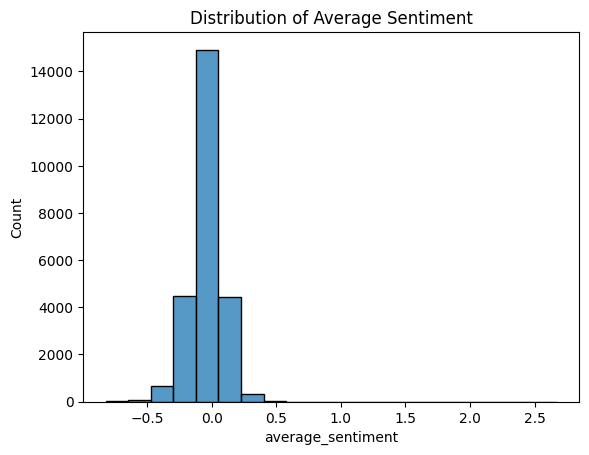

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


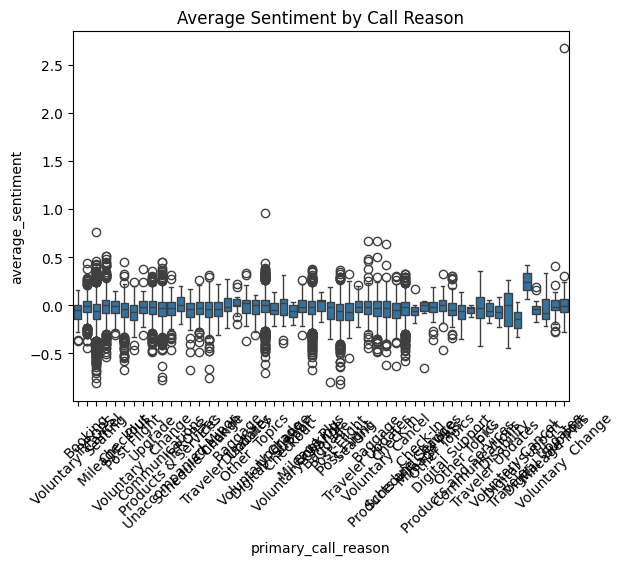

Correlation between Sentiment and Duration: -0.048391904569048697


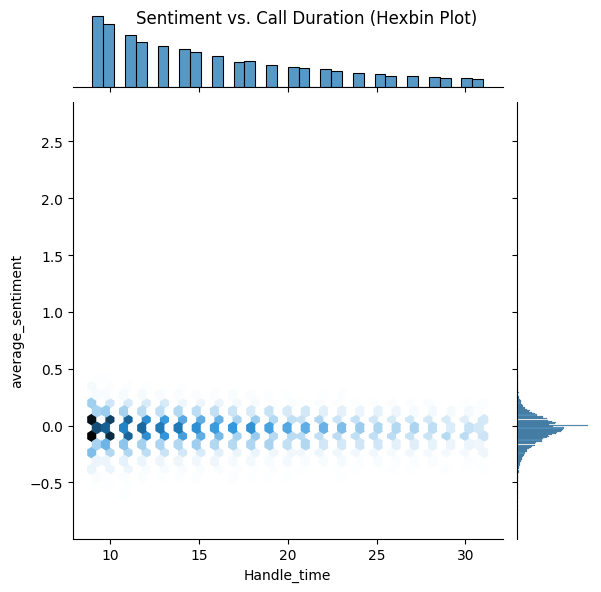

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Descriptive statistics
overall_avg_sentiment = long_calls['average_sentiment'].mean()
print(f"Overall Average Sentiment: {overall_avg_sentiment}")

sns.histplot(long_calls['average_sentiment'], bins=20)
plt.title("Distribution of Average Sentiment")
plt.show()

# Segmentation and comparison
sns.boxplot(x='primary_call_reason', y='average_sentiment', data=long_calls)
plt.title("Average Sentiment by Call Reason")
plt.xticks(rotation=45)
plt.show()

# Correlation analysis
correlation = long_calls['average_sentiment'].corr(long_calls['Handle_time'])
print(f"Correlation between Sentiment and Duration: {correlation}")

# Using a hexbin plot instead of a scatter plot
sns.jointplot(x='Handle_time', y='average_sentiment', data=long_calls, kind='hex')
plt.suptitle("Sentiment vs. Call Duration (Hexbin Plot)")
plt.show()

In [28]:
correlation = long_calls['average_sentiment'].corr(long_calls['Handle_time'])
print(f"Correlation between Sentiment and Duration: {correlation}")

Correlation between Sentiment and Duration: -0.048391904569048697


In [29]:
correlation = long_calls['silence_percent_average'].corr(long_calls['Handle_time'])
print(f"Correlation between Sentiment and Duration: {correlation}")

Correlation between Sentiment and Duration: 0.2082637067218456


In [44]:
mr_df['Speed time']=mr_df['agent_assigned_datetime']-mr_df['call_start_datetime']

In [45]:
mr_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,0 days 00:07:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35,0 days 00:03:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32,0 days 00:08:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,0 days 00:05:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,0 days 00:06:00
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34,0 days 00:09:00
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22,0 days 00:03:00
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:06:00,6.0,Upgrade,616988,calm,polite,0.05,0.42,0 days 00:06:00


In [47]:
mr_df['Speed time'].dt.total_seconds() / 60

,Speed time
0,7.0
1,3.0
2,8.0
3,5.0
4,10.0
...,...
66648,6.0
66649,9.0
66650,3.0
66651,6.0


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: xlabel='Speed time'>

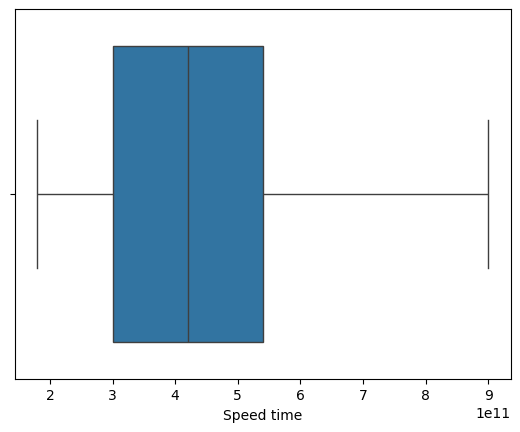

In [48]:
sns.boxplot(x=mr_df['Speed time'])

In [49]:
mr_df['Speed time'].describe()

,Speed time
count,66653
mean,0 days 00:07:16.972079276
std,0 days 00:02:31.155331103
min,0 days 00:03:00
25%,0 days 00:05:00
50%,0 days 00:07:00
75%,0 days 00:09:00
max,0 days 00:15:00


In [51]:
total = mr_df.isnull().sum().sort_values(ascending = False)
percent = (mr_df.isnull().sum()/mr_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
agent_tone,198,0.002971
average_sentiment,101,0.001515
call_id,0,0.000000
customer_id,0,0.000000
agent_id_x,0,0.000000
call_start_datetime,0,0.000000
agent_assigned_datetime,0,0.000000
call_end_datetime,0,0.000000
call_transcript,0,0.000000
time_difference,0,0.000000


In [52]:
mr_df = mr_df.dropna(subset=['agent_tone'])
mr_df = mr_df.dropna(subset=['average_sentiment'])

In [53]:
total = mr_df.isnull().sum().sort_values(ascending = False)
percent = (mr_df.isnull().sum()/mr_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
call_id,0,0.0
customer_id,0,0.0
agent_id_x,0,0.0
call_start_datetime,0,0.0
agent_assigned_datetime,0,0.0
call_end_datetime,0,0.0
call_transcript,0,0.0
time_difference,0,0.0
minutes,0,0.0
primary_call_reason,0,0.0


In [54]:
mr_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,0 days 00:07:00
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35,0 days 00:03:00
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32,0 days 00:08:00
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,0 days 00:05:00
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35,0 days 00:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,0 days 00:06:00
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34,0 days 00:09:00
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22,0 days 00:03:00
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:06:00,6.0,Upgrade,616988,calm,polite,0.05,0.42,0 days 00:06:00


In [56]:
mr_df['waiting_time']= mr_df['Speed time'].dt.total_seconds() / 60

In [57]:
mr_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,Speed time,waiting_time
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,0 days 00:07:00,7.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35,0 days 00:03:00,3.0
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32,0 days 00:08:00,8.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,0 days 00:05:00,5.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35,0 days 00:10:00,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66648,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,0 days 00:06:00,6.0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34,0 days 00:09:00,9.0
66650,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22,0 days 00:03:00,3.0
66651,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:06:00,6.0,Upgrade,616988,calm,polite,0.05,0.42,0 days 00:06:00,6.0


In [58]:
mr_df=mr_df.drop(['Speed time'],axis=1)

In [59]:
mr_df.describe()

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,time_difference,minutes,agent_id_y,average_sentiment,silence_percent_average,waiting_time
count,6.645500e+04,6.645500e+04,66455.000000,66455,66455,66455,66455,66455.000000,66455.000000,66455.000000,66455.000000,66455.000000
mean,4.993530e+09,5.007921e+09,564550.831345,2024-08-16 11:01:27.871492096,2024-08-16 11:08:44.818298368,2024-08-16 11:20:23.134150656,0 days 00:11:38.315852832,11.638598,564550.831345,-0.032746,0.285626,7.282447
min,1.316420e+05,4.430700e+05,102574.000000,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:17:00,0 days 00:00:00,0.000000,102574.000000,-0.940000,0.000000,3.000000
25%,2.480920e+09,2.516644e+09,347606.000000,2024-08-09 11:21:30,2024-08-09 11:28:00,2024-08-09 11:43:00,0 days 00:04:00,4.000000,347606.000000,-0.110000,0.130000,5.000000
50%,4.987291e+09,5.008168e+09,591778.000000,2024-08-17 09:11:00,2024-08-17 09:18:00,2024-08-17 09:31:00,0 days 00:07:00,7.000000,591778.000000,-0.020000,0.260000,7.000000
75%,7.494129e+09,7.510294e+09,786323.000000,2024-08-24 14:24:00,2024-08-24 14:30:00,2024-08-24 14:41:00,0 days 00:15:00,15.000000,786323.000000,0.050000,0.410000,9.000000
max,9.999806e+09,9.999935e+09,993862.000000,2024-08-31 23:55:00,2024-08-31 23:59:00,2024-09-01 01:33:00,0 days 01:59:00,119.000000,993862.000000,2.670000,0.980000,15.000000
std,2.889584e+09,2.883500e+09,257474.951601,NaN,NaN,NaN,0 days 00:12:54.719207375,12.911987,257474.951601,0.141602,0.192016,2.519454


In [62]:
mr_df['waiting_time'].describe()

,waiting_time
count,66455.000000
mean,7.282447
std,2.519454
min,3.000000
25%,5.000000
50%,7.000000
75%,9.000000
max,15.000000


In [63]:
def find_outliers_zscore(mr_df, waiting_time, threshold=15):
  z = np.abs((mr_df[waiting_time] - mr_df[waiting_time].mean()) / mr_df[waiting_time].std())
  outliers = mr_df[z > threshold]
  return outliers

# Example usage
outliers = find_outliers_zscore(mr_df, 'waiting_time')
print(outliers)

Empty DataFrame
Columns: [call_id, customer_id, agent_id_x, call_start_datetime, agent_assigned_datetime, call_end_datetime, call_transcript, time_difference, minutes, primary_call_reason, agent_id_y, agent_tone, customer_tone, average_sentiment, silence_percent_average, waiting_time]
Index: []


In [65]:
long_waiting =mr_df[mr_df['waiting_time'] >7.282447 ]
long_waiting

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,waiting_time
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32,8.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35,10.0
6,324593040,6774865122,519057,2024-08-01 00:08:00,2024-08-01 00:21:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,13.0,Checkout,519057,neutral,frustrated,0.00,0.25,13.0
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Mileage Plus,488324,calm,angry,0.11,0.35,8.0
8,7222687732,8023417234,957331,2024-08-01 00:14:00,2024-08-01 00:22:00,2024-08-01 00:35:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:13:00,13.0,Mileage Plus,957331,calm,neutral,0.06,0.54,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66643,3994661770,3216879005,771538,2024-08-31 23:41:00,2024-08-31 23:52:00,2024-09-01 00:01:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Voluntary Change,771538,neutral,neutral,-0.09,0.41,11.0
66644,8432220782,4800195868,336455,2024-08-31 23:44:00,2024-08-31 23:53:00,2024-09-01 00:13:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:20:00,20.0,Seating,336455,neutral,angry,-0.03,0.23,9.0
66647,9581271057,6137149578,335773,2024-08-31 23:46:00,2024-08-31 23:56:00,2024-08-31 23:59:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,3.0,Voluntary Change,335773,neutral,angry,-0.25,0.03,10.0
66649,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34,9.0


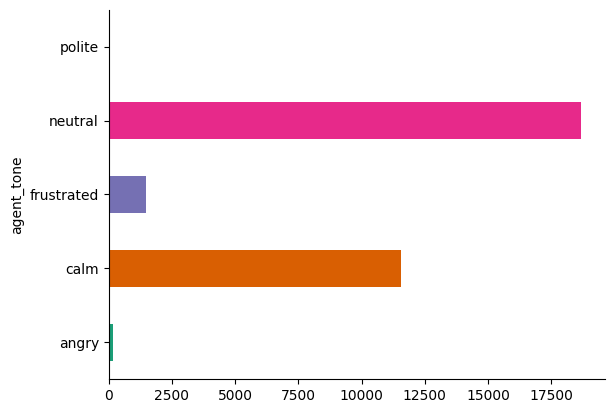

In [68]:
# @title agent_tone

from matplotlib import pyplot as plt
import seaborn as sns
long_waiting.groupby('agent_tone').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [66]:
correlation = long_waiting['average_sentiment'].corr(long_waiting['waiting_time'])
print(f"Correlation between Sentiment and Duration: {correlation}")

Correlation between Sentiment and Duration: 0.014903719520334736


In [67]:
correlation = long_waiting['silence_percent_average'].corr(long_waiting['waiting_time'])
print(f"Correlation between Sentiment and Duration: {correlation}")

Correlation between Sentiment and Duration: -0.002905271738215609


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


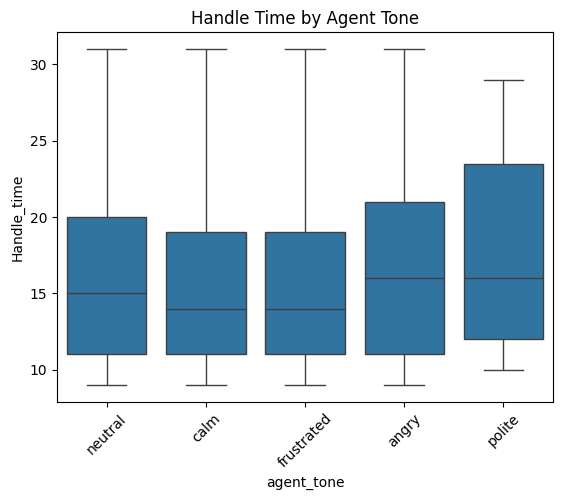

In [69]:
   import seaborn as sns
   import matplotlib.pyplot as plt

   sns.boxplot(x='agent_tone', y='Handle_time', data=long_calls)
   plt.title('Handle Time by Agent Tone')
   plt.xticks(rotation=45)  # Rotate x-axis labels if needed
   plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


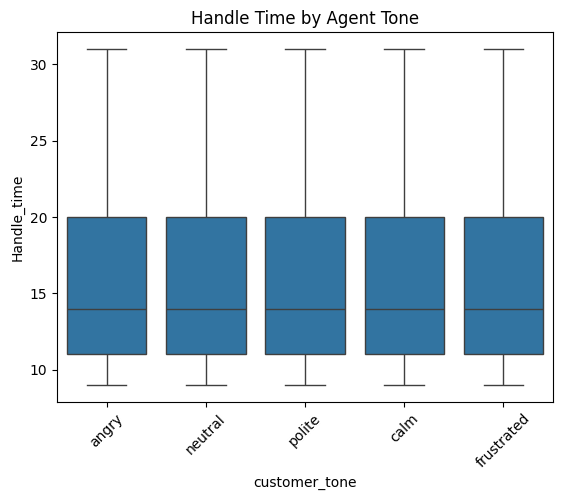

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='customer_tone', y='Handle_time', data=long_calls)
plt.title('Handle Time by Agent Tone')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


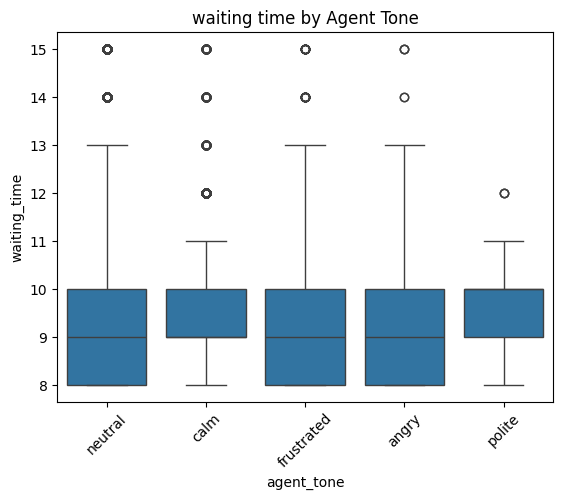

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='agent_tone', y='waiting_time', data=long_waiting)
plt.title('waiting time by Agent Tone')
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.show()

In [74]:
df3=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/customers2afd6ea.csv')


In [76]:
m_df=pd.merge(mr_df,df3,on='customer_id')

In [77]:
m_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,waiting_time,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,7.0,Matthew Foster,4.0
1,1122072124,8186702651,519057,2024-08-01 00:03:00,2024-08-01 00:06:00,2024-08-01 00:18:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:12:00,12.0,Booking,519057,calm,neutral,0.02,0.35,3.0,Tammy Walters,NaN
2,6834291559,2416856629,158319,2024-07-31 23:59:00,2024-08-01 00:07:00,2024-08-01 00:26:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:19:00,19.0,IRROPS,158319,neutral,polite,-0.13,0.32,8.0,Jeffery Dixon,NaN
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,5.0,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35,10.0,Elizabeth Daniels,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,6.0,Kevin Warner,2.0
66451,1563273072,8022667294,413148,2024-08-31 23:48:00,2024-08-31 23:57:00,2024-09-01 00:25:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:28:00,28.0,Post Flight,413148,calm,calm,0.05,0.34,9.0,Dennis Singleton DDS,NaN
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22,3.0,Paul Mitchell,1.0
66453,8019240181,9762042472,616988,2024-08-31 23:52:00,2024-08-31 23:58:00,2024-09-01 00:04:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:06:00,6.0,Upgrade,616988,calm,polite,0.05,0.42,6.0,Kaylee Lang,NaN


In [79]:
correlation = m_df['minutes'].corr(m_df['elite_level_code'])
print(f"Correlation between handle time and elite level code: {correlation}")

Correlation between handle time and elite level code: 0.0387246944955625


In [85]:
total = m_df.isnull().sum().sort_values(ascending = False)
percent = (m_df.isnull().sum()/m_df.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
elite_level_code,23876,0.359281
customer_id,0,0.000000
customer_name,0,0.000000
waiting_time,0,0.000000
silence_percent_average,0,0.000000
average_sentiment,0,0.000000
customer_tone,0,0.000000
agent_tone,0,0.000000
agent_id_y,0,0.000000
call_id,0,0.000000


In [86]:
ym_df = m_df.dropna(subset=['elite_level_code'])
ym_df

,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,primary_call_reason,agent_id_y,agent_tone,customer_tone,average_sentiment,silence_percent_average,waiting_time,customer_name,elite_level_code
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,Voluntary Cancel,963118,neutral,angry,-0.04,0.39,7.0,Matthew Foster,4.0
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,Upgrade,488324,neutral,frustrated,-0.20,0.20,5.0,David Wilkins,2.0
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,Seating,721730,neutral,polite,-0.05,0.35,10.0,Elizabeth Daniels,0.0
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:24:00,24.0,Mileage Plus,817160,calm,calm,0.10,0.11,5.0,Emily Alexander,5.0
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Mileage Plus,488324,calm,angry,0.11,0.35,8.0,Megan Craig,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66448,8351489985,5821883708,859203,2024-08-31 23:48:00,2024-08-31 23:55:00,2024-09-01 00:10:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:15:00,15.0,Upgrade,859203,neutral,polite,-0.07,0.04,7.0,Maria Howard,1.0
66449,9581271057,6137149578,335773,2024-08-31 23:46:00,2024-08-31 23:56:00,2024-08-31 23:59:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,3.0,Voluntary Change,335773,neutral,angry,-0.25,0.03,10.0,Michelle Ray,0.0
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,Mileage Plus,783441,neutral,frustrated,-0.19,0.51,6.0,Kevin Warner,2.0
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,Upgrade,980156,calm,frustrated,0.03,0.22,3.0,Paul Mitchell,1.0


In [87]:
correlation = ym_df['minutes'].corr(ym_df['elite_level_code'])
print(f"Correlation between handle time and elite level code: {correlation}")

Correlation between handle time and elite level code: 0.0387246944955625


In [88]:
correlation = ym_df['waiting_time'].corr(ym_df['elite_level_code'])
print(f"Correlation between handle time and elite level code: {correlation}")

Correlation between handle time and elite level code: -0.04150299928044037


In [91]:
unique_agent_count =ym_df['agent_id_x'].nunique()
print(f"Number of unique agents: {unique_agent_count}")

Number of unique agents: 382


In [ ]:
_counts = long_calls['agent_tone'].value_counts()
print(tone_counts)

In [93]:
import pandas as pd

# Assuming 'categorical_column' is the name of your categorical column
encoded_df = pd.get_dummies(ym_df, columns=['primary_call_reason','agent_tone'])

In [94]:
encoded_df


,call_id,customer_id,agent_id_x,call_start_datetime,agent_assigned_datetime,call_end_datetime,call_transcript,time_difference,minutes,agent_id_y,...,primary_call_reason_Voluntary Change,primary_call_reason_Voluntary Cancel,primary_call_reason_Voluntary Cancel,primary_call_reason_Voluntary Change,primary_call_reason_Voluntary Change,agent_tone_angry,agent_tone_calm,agent_tone_frustrated,agent_tone_neutral,agent_tone_polite
0,4667960400,2033123310,963118,2024-07-31 23:56:00,2024-08-01 00:03:00,2024-08-01 00:34:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:31:00,31.0,963118,...,False,False,False,False,False,False,False,False,True,False
3,2266439882,1154544516,488324,2024-08-01 00:05:00,2024-08-01 00:10:00,2024-08-01 00:17:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:07:00,7.0,488324,...,False,False,False,False,False,False,False,False,True,False
4,1211603231,5214456437,721730,2024-08-01 00:04:00,2024-08-01 00:14:00,2024-08-01 00:23:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:09:00,9.0,721730,...,False,False,False,False,False,False,False,False,True,False
5,5297766997,5590154991,817160,2024-08-01 00:11:00,2024-08-01 00:16:00,2024-08-01 00:40:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:24:00,24.0,817160,...,False,False,False,False,False,False,True,False,False,False
7,8902603117,7974326984,488324,2024-08-01 00:13:00,2024-08-01 00:21:00,2024-08-01 00:29:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,488324,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66448,8351489985,5821883708,859203,2024-08-31 23:48:00,2024-08-31 23:55:00,2024-09-01 00:10:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:15:00,15.0,859203,...,False,False,False,False,False,False,False,False,True,False
66449,9581271057,6137149578,335773,2024-08-31 23:46:00,2024-08-31 23:56:00,2024-08-31 23:59:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:03:00,3.0,335773,...,True,False,False,False,False,False,False,False,True,False
66450,7569738090,7367304988,783441,2024-08-31 23:51:00,2024-08-31 23:57:00,2024-09-01 00:07:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:10:00,10.0,783441,...,False,False,False,False,False,False,False,False,True,False
66452,8865997781,4474867021,980156,2024-08-31 23:55:00,2024-08-31 23:58:00,2024-09-01 00:06:00,\n\nAgent: Thank you for calling United Airlin...,0 days 00:08:00,8.0,980156,...,False,False,False,False,False,False,True,False,False,False


In [97]:
ym_df=ym_df.drop(['call_transcript'],axis=1)

In [101]:
encoded_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 42579 entries, 0 to 66454
Data columns (total 74 columns):
 #   Column                                       Non-Null Count  Dtype          
---  ------                                       --------------  -----          
 0   call_id                                      42579 non-null  int64          
 1   customer_id                                  42579 non-null  int64          
 2   agent_id_x                                   42579 non-null  int64          
 3   call_start_datetime                          42579 non-null  datetime64[ns] 
 4   agent_assigned_datetime                      42579 non-null  datetime64[ns] 
 5   call_end_datetime                            42579 non-null  datetime64[ns] 
 6   call_transcript                              42579 non-null  object         
 7   time_difference                              42579 non-null  timedelta64[ns]
 8   minutes                                      42579 non-null  float64   

In [98]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'ym_df' is your DataFrame

# Calculate the correlation matrix
correlation_matrix = ym_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of All Columns")
plt.show()

ValueError: could not convert string to float: 'Voluntary  Cancel'

In [104]:
!pip install nltk pandas scikit-learn

import nltk
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')
nltk.download('stopwords')

def analyze_transcripts_and_reasons(m_df):
    """
    Analyzes call transcripts and primary call reasons to identify recurring, self-solvable issues.

    Args:
        ym_df: DataFrame containing 'call_transcript' and 'primary_call_reason' columns.

    Returns:
        A list of recurring, self-solvable issues identified from the analysis.
    """

    # 1. Preprocessing
    # Combine transcripts and reasons for a holistic view
    ym_df['combined_text'] = ym_df['primary_call_reason'].astype(str) + ' ' + ym_df['call_transcript'].astype(str)

    # Tokenize, remove stop words, and lowercase the text
    stop_words = nltk.corpus.stopwords.words('english')
    ym_df['tokens'] = ym_df['combined_text'].apply(lambda text: [word.lower() for word in nltk.word_tokenize(text) if word.lower() not in stop_words and word.isalnum()])

    # 2. Feature Extraction using TF-IDF
    vectorizer = TfidfVectorizer(max_features=1000) # Adjust as needed
    tfidf_matrix = vectorizer.fit_transform([' '.join(tokens) for tokens in ym_df['tokens']])

    # 3. Identifying Recurring Issues
    # (a) Cluster similar transcripts using a clustering algorithm (e.g., KMeans)
    # (This part requires more advanced analysis and is left for future implementation)

    # (b) For now, let's focus on frequent terms/phrases in 'primary_call_reason':
    reason_counts = ym_df['primary_call_reason'].value_counts()
    recurring_reasons = reason_counts[reason_counts > 10].index.tolist() # Adjust threshold as needed

    # 4. Filtering for Self-Solvable Issues
    # (This requires domain expertise to identify which reasons are typically self-solvable)
    # Example:
    self_solvable_keywords = ['Baggage', 'Booking', 'Check In', 'Checkout','Digital Support','Mileage Plus','Products and Services','Schedule Change','Seating','Traveler Updates','Voluntary Change']
    self_solvable_reasons = [reason for reason in recurring_reasons
                             if any(keyword in reason.lower() for keyword in self_solvable_keywords)]

    # 5. Deeper Analysis (Optional)
    # For each self-solvable reason, examine corresponding transcripts for more specific insights.

    return self_solvable_reasons

# Example usage
self_solvable_issues = analyze_transcripts_and_reasons(m_df)
print("Recurring Self-Solvable Issues:", self_solvable_issues)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Recurring Self-Solvable Issues: []


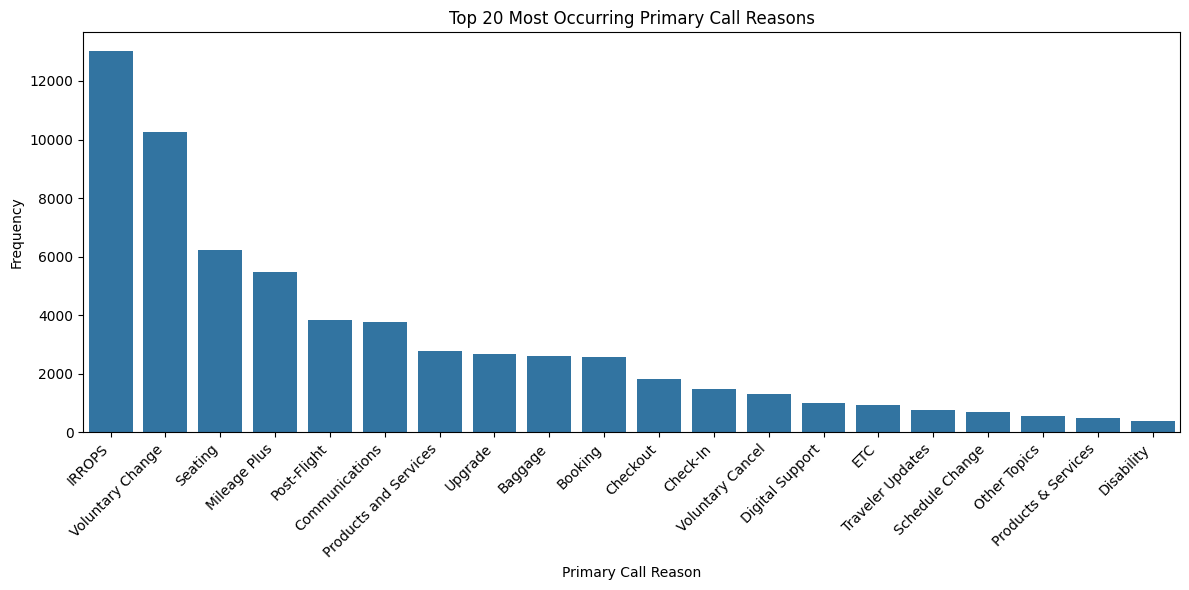

In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_most_occurring_reasons(ym_df, top_n=10):
    """
    Plots the most occurring primary call reasons as a bar chart.

    Args:
        ym_df: DataFrame containing the 'primary_call_reason' column.
        top_n: The number of top reasons to display (default is 10).
    """
    reason_counts = ym_df['primary_call_reason'].value_counts().nlargest(top_n)
    plt.figure(figsize=(12, 6))  # Adjust figure size as needed
    sns.barplot(x=reason_counts.index, y=reason_counts.values)
    plt.title(f'Top {top_n} Most Occurring Primary Call Reasons')
    plt.xlabel('Primary Call Reason')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Example usage
plot_most_occurring_reasons(m_df, top_n=15) # Display top 15 reasons